https://github.com/brianhie/scanorama

In [1]:
import scanorama
import anndata as ad
import scanpy as sc

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/intervaltree/intervaltree.py:37: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  class IntervalTree(collections.MutableSet):


In [2]:
sc.set_figure_params(dpi=100, frameon=False, color_map='Reds')
sc.logging.print_header()

/home/icb/yuge.ji/miniconda3/envs/py37/lib/python3.7/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)
2022-02-21 23:21:49.191720: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-21 23:21:49.191752: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


scanpy==1.8.2 anndata==0.7.6 umap==0.5.2 numpy==1.20.3 scipy==1.5.3 pandas==1.3.4 scikit-learn==1.0.2 statsmodels==0.11.1 python-igraph==0.8.3 leidenalg==0.8.3 pynndescent==0.5.5


In [3]:
adata = sc.read('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/211015_annot_patient_integrated.h5ad')
adata

AnnData object with n_obs × n_vars = 300353 × 18115
    obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_batch', '_scvi_labels', 'celltype_fine'
    var: 'used_for_scvi'
    uns: '_scvi', 'cell_type_colors', 'celltype_coarse_colors', 'celltype_fine_colors', 'hvg', 'infected_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'rank_genes_groups', 'treatment_colors', 'umap'
    obsm: 'X_pca', 'X_scVI', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
adatas = [adata[adata.obs.patient == p] for p in adata.obs.patient.unique()]

In [5]:
adatas

[View of AnnData object with n_obs × n_vars = 43075 × 18115
     obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_batch', '_scvi_labels', 'celltype_fine'
     var: 'used_for_scvi'
     uns: '_scvi', 'celltype_fine_colors', 'hvg', 'infected_colors', 'leiden', 'neighbors', 'patient_colors', 'rank_genes_groups', 'treatment_colors', 'umap'
     obsm: 'X_pca', 'X_scVI', 'X_umap'
     layers: 'counts'
     obsp: 'connectivities', 'distances',
 View of AnnData object with n_obs × n_vars = 25547 × 18115
     obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_b

Scanorama integration on this dataset takes ~1.5hrs.

In [ ]:
%%time
# Integration and batch correction.
corrected = scanorama.correct_scanpy(adatas, return_dimred=True)

Found 18115 genes among all datasets
[[0.         0.82201433 0.01079512 0.00631457]
 [0.         0.         0.12545504 0.08247544]
 [0.         0.         0.         0.50119778]
 [0.         0.         0.         0.        ]]
Processing datasets (0, 1)
Processing datasets (2, 3)


In [ ]:
%%time
new_adata = ad.concat(corrected)

In [ ]:
new_adata.write('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/211015_annot_patient_integrated_scanorama.h5ad', compression='gzip')

Add back in metadata.

In [13]:
adata.X = new_adata[adata.obs.index, :].X.copy()

In [18]:
adata.X[:10].toarray()

array([[ 3.2985638e-05,  0.0000000e+00, -1.9991938e-07, ...,
         8.6599402e-04, -2.3749939e-03,  2.6866954e-04],
       [ 3.4647892e-05,  0.0000000e+00,  8.5487852e-07, ...,
         9.0062275e-04,  7.5330399e-03,  1.0064708e-02],
       [ 3.3586268e-05,  0.0000000e+00, -1.6232605e-07, ...,
         8.8529574e-04,  3.4450446e-03,  2.6872710e-04],
       ...,
       [ 3.0638188e-05,  0.0000000e+00,  9.9432543e-07, ...,
         8.5068948e-04,  7.6071704e-03,  2.0992837e-04],
       [ 3.1822387e-05,  0.0000000e+00, -3.6661657e-08, ...,
         9.1346697e-04,  4.1887825e-03,  2.6154472e-04],
       [ 4.3760992e-05,  0.0000000e+00,  7.8120843e-07, ...,
         8.0618163e-04, -2.4899871e-03,  1.8796569e-04]], dtype=float32)

In [14]:
adata.obsm['X_scanorama'] = new_adata.obsm['X_scanorama']

In [15]:
%%time
sc.pp.neighbors(adata)
sc.tl.leiden(adata, key_added='leiden_scanorama')
sc.tl.umap(adata)

CPU times: user 26min 26s, sys: 3min 12s, total: 29min 39s
Wall time: 10min 18s


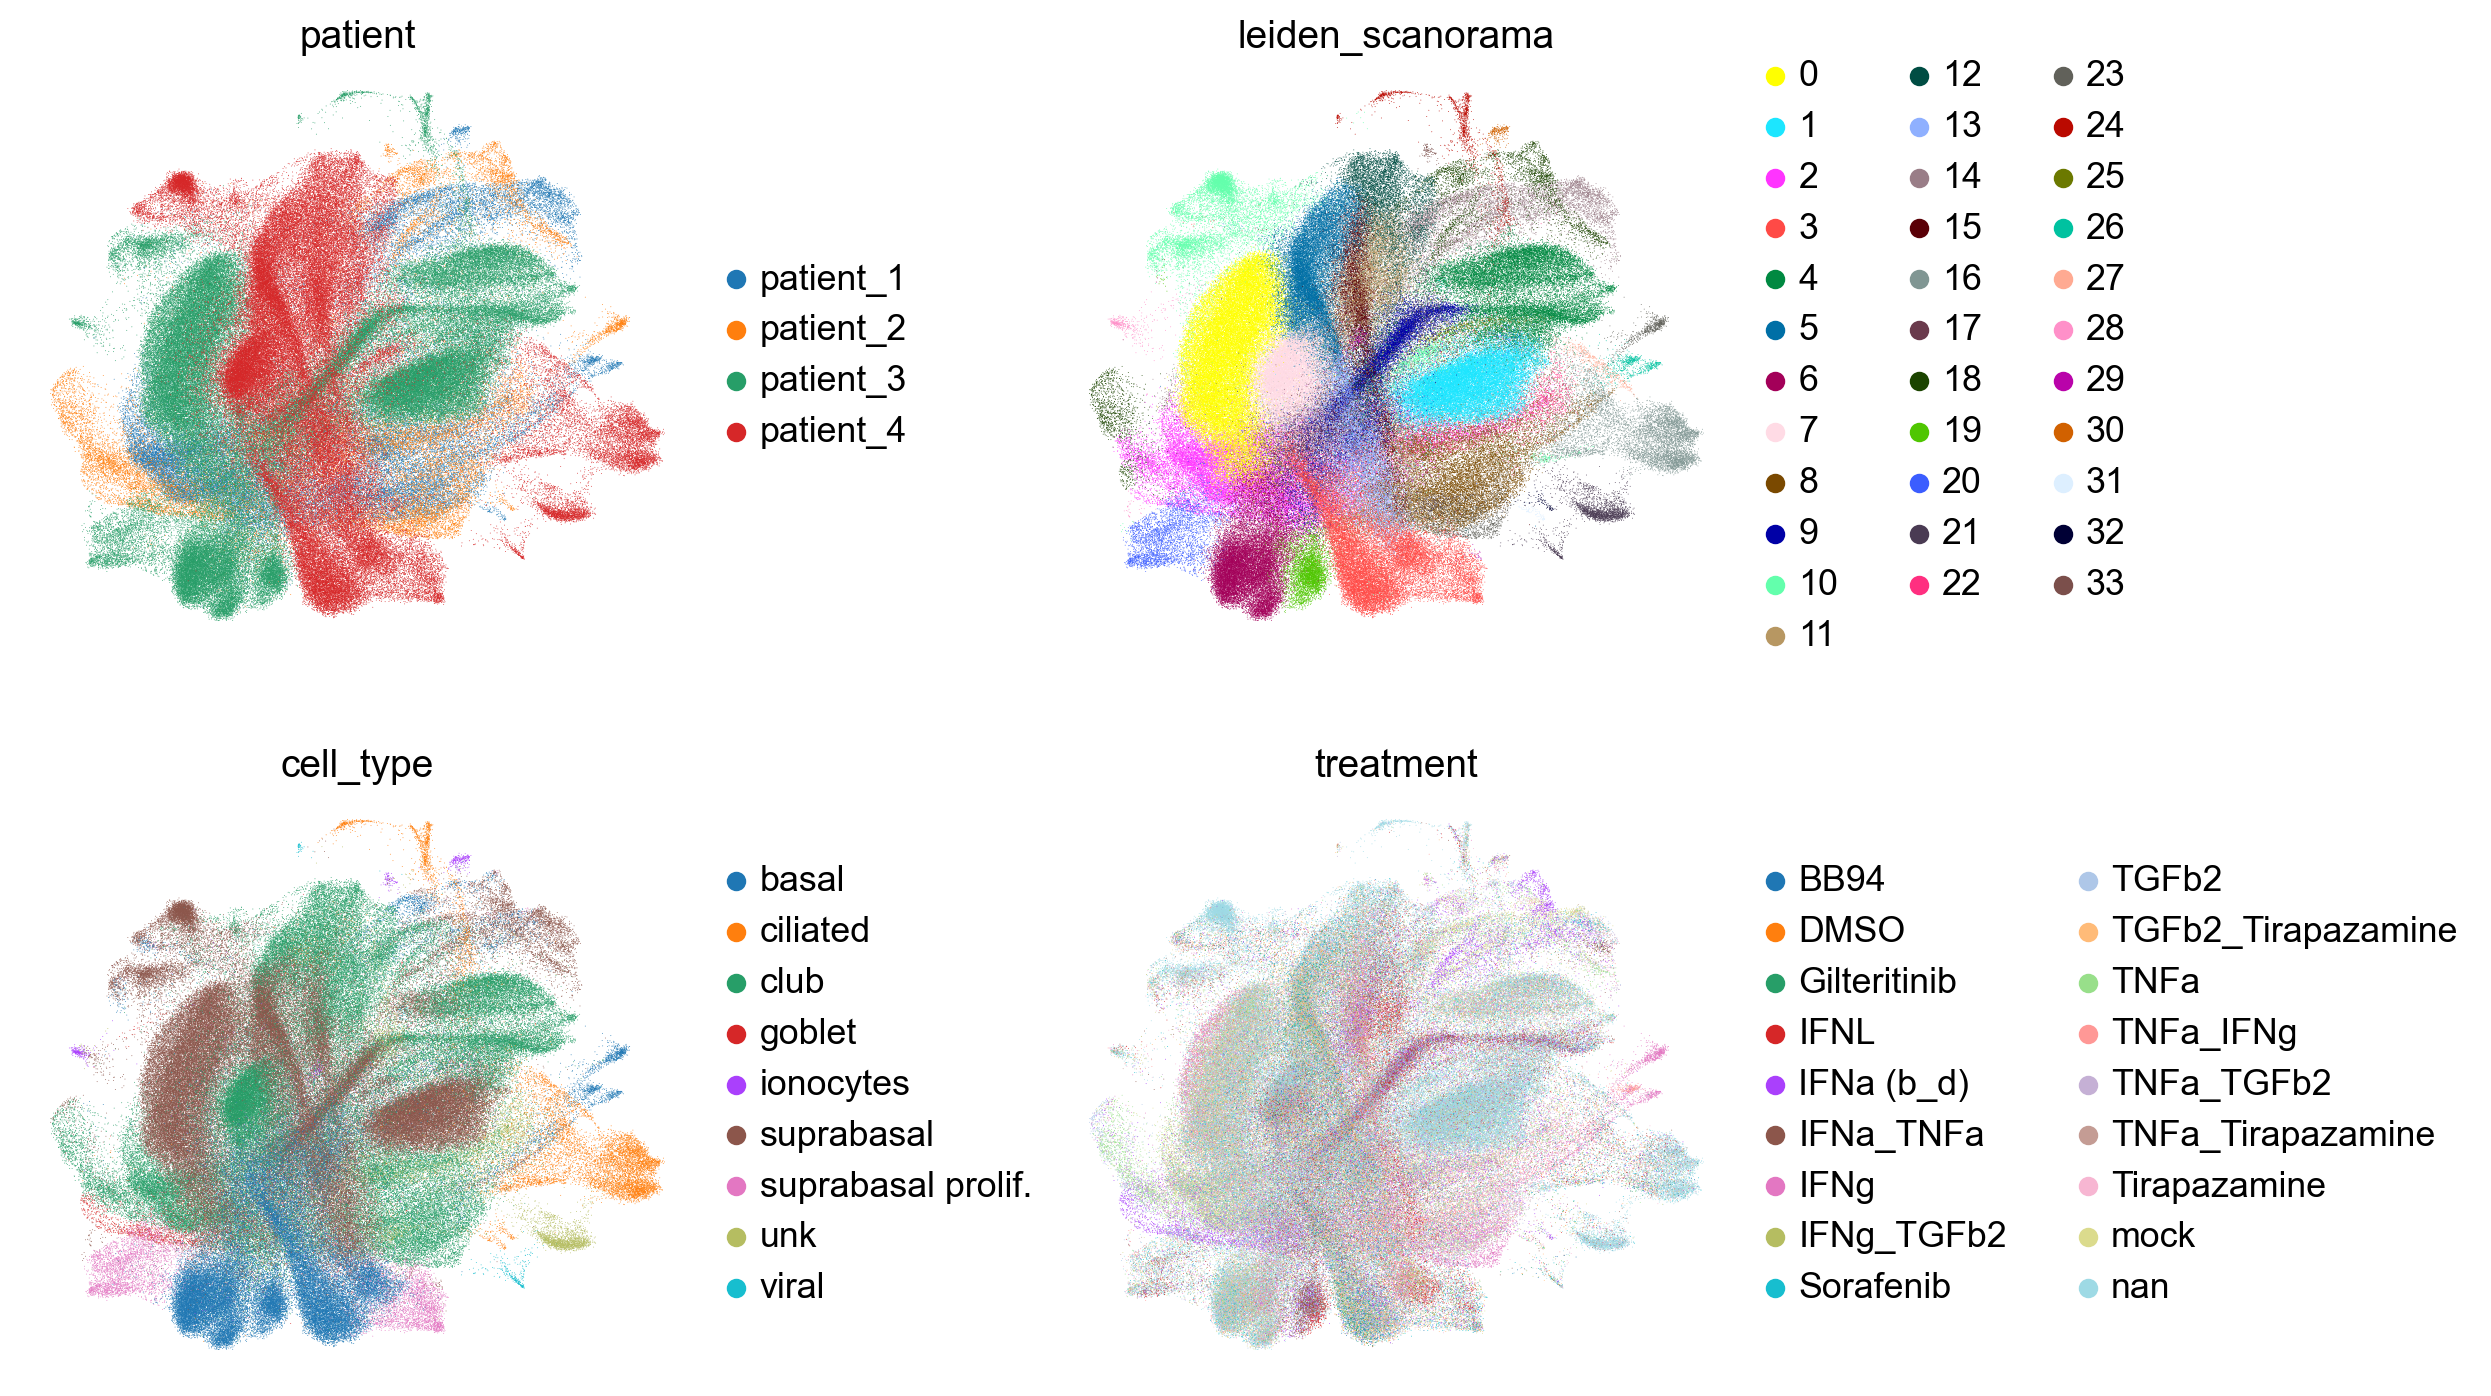

In [16]:
sc.pl.umap(adata, color=['patient', 'leiden_scanorama', 'cell_type', 'treatment'], wspace=.4, ncols=2)

In [17]:
%%time
sc.write('/storage/groups/ml01/workspace/yuge.ji/covid-perturbation/data/220128_annot_patient_integrated_scanorama.h5ad', adata, compression='gzip')
adata

CPU times: user 13min 43s, sys: 33.7 s, total: 14min 17s
Wall time: 15min 57s


AnnData object with n_obs × n_vars = 300353 × 18115
    obs: 'identifier', 'patient', 'name', 'barcode_round', 'sample', 'viral_counts', 'treatment', 'treatment_virus', 'infected', 'n_counts', 'n_genes', 'percent_mito', 'percent_viral', 'leiden', 'final_bcs', 'batch', 'celltype_coarse', 'cell_type', 'infection_label', '_scvi_batch', '_scvi_labels', 'celltype_fine', 'leiden_scanorama'
    var: 'used_for_scvi'
    uns: '_scvi', 'cell_type_colors', 'celltype_coarse_colors', 'celltype_fine_colors', 'hvg', 'infected_colors', 'leiden', 'leiden_colors', 'neighbors', 'patient_colors', 'rank_genes_groups', 'treatment_colors', 'umap', 'leiden_scanorama_colors'
    obsm: 'X_pca', 'X_scVI', 'X_umap', 'X_scanorama'
    layers: 'counts'
    obsp: 'connectivities', 'distances'